
# **Tarea: simulación y análisis de Paseos Aleatorios Simples**  


Esta tarea tiene como objetivo la implementación y análisis de paseos aleatorios simples en dos escenarios:  
1. **Tiempo discreto:** $t\in\{1,2,\ldots,\}$. 
2. **Tiempo continuo:** $t\in [0,  \infty)$.  

Además, se realizará un **análisis estadístico** del proceso en distintos instantes de tiempo y se utilizará el **método de Montecarlo** para validar las propiedades del proceso.

#### **Parte 1: Paseo Aleatorio Simple en tiempo discreto**  

Un **paseo aleatorio simple** es un proceso estocástico definido por:

$$
S_t = S_{t-1} + X_t, \quad t = 1, 2, 3, \dots
$$

donde:
- $S_t$  representa la posición en el instante  $t$.
- $X_t$  es una variable aleatoria i.i.d. tales que:
  $$
  X_t =
  \begin{cases} 
  +1, & \text{con probabilidad } \frac{1}{2} \\
  -1, & \text{con probabilidad } \frac{1}{2} 
  \end{cases}
  $$

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo discreto.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.


#### **Parte 2: Paseo Aleatorio Simple en tiempo continuo**  

Consideremos ahora la versión del **paseo aleatorio simple en tiempo continuo** donde $X_t \sim N(0,1)$ son variables aleatorias i.i.d. normales estándar.

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo continuo.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.


#### **Parte 3: Cálculo de Media y Varianza en Instantes Específicos**  

Consideremos ahora el **paseo aleatorio simple en tiempo discreto** de la Parte 1. Para analizar la evolución del proceso, se pide:

1. Calcular la **media muestral** y la **varianza muestral** de  $S_t$  en los tiempos: $t = 5$, $t = 15$ y $t = 25$.
2. Comprobar que los resultados son acordes a lo visto en clase.

#### **Parte 4: Simulaciones de Montecarlo para obtener propiedades estadísticas**  

Repetir 5000 veces la simulación de la Parte 1 (es decir, se generarán 200 realizaciones del paseo aleatorio simple discreto en cada repetición). Para cada experimento:

1. Se generarán 200 realizaciones del paseo aleatorio simple discreto.
2. Se calcularán las medias muestrales y varianzas muestrales en $t = 5$, $t = 15$ y $t = 25$.
3. Se almacenarán los valores de media y varianza obtenidos en cada una de las 5000 repeticiones.

Al finalizar, se calcularán:

1. La media de las 5000 medias muestrales para cada $ t $.
2. La media de las 5000 varianzas muestrales para cada $ t $.

##### **Preguntas para reflexionar**
- ¿Hacia qué valores esperas que converjan la media y la varianza muestral?  
- ¿Cómo se relacionan estos valores con las propiedades teóricas del paseo aleatorio?  
- ¿Cómo podrías verificar la ley de los grandes números en este contexto?



In [26]:
import numpy as np

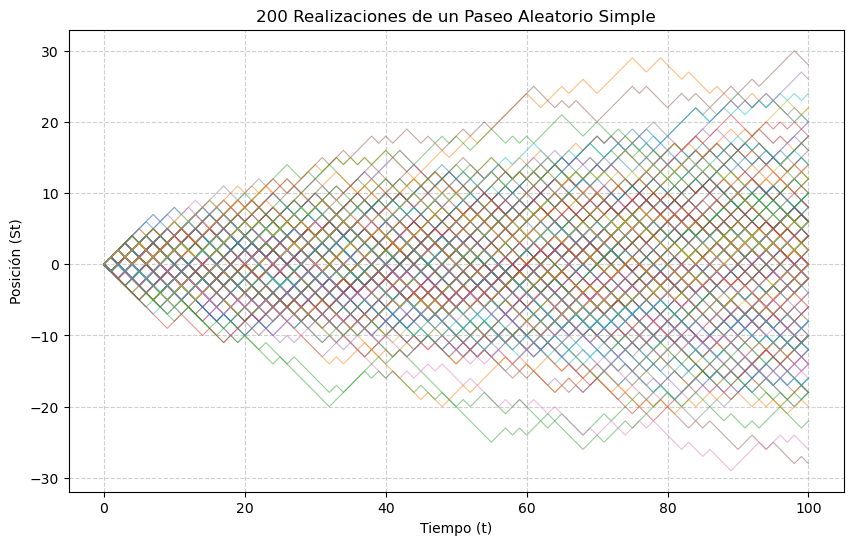

In [27]:
# Ejercicio 1 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(987)

# Parámetros 
num_simulaciones = 200  
num_pasos = 100  
S0 = 0  

# Generar las trayectorias 
X = np.random.choice([-1, 1], size=(num_simulaciones, num_pasos))  
S = np.cumsum(X, axis=1) 
S = np.hstack((np.zeros((num_simulaciones, 1)), S))  

# Graficar las trayectorias
plt.figure(figsize=(10, 6))
for i in range(num_simulaciones):
    plt.plot(S[i], alpha=0.5, linewidth=0.8)  

plt.xlabel('Tiempo (t)')
plt.ylabel('Posición (St)')
plt.title('200 Realizaciones de un Paseo Aleatorio Simple')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

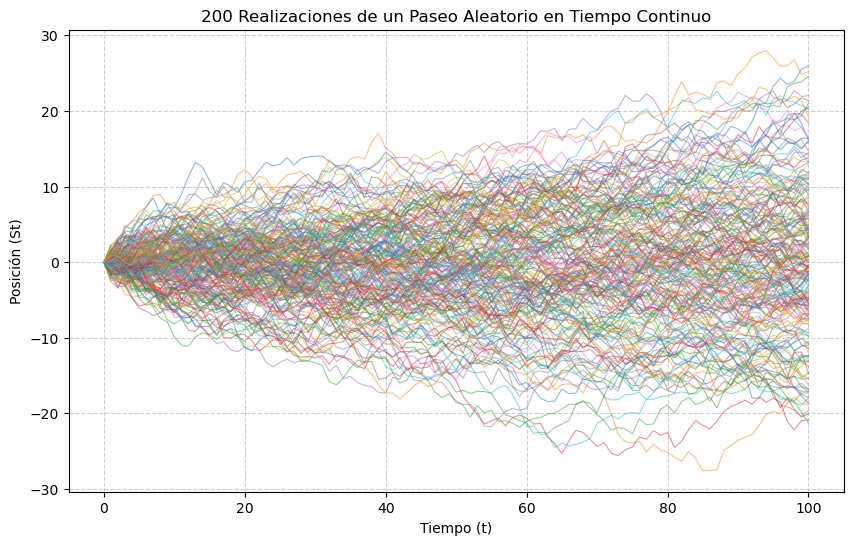

In [28]:
# Ejercicio 2
import numpy as np
import matplotlib.pyplot as plt

# Fijar la semilla para reproducibilidad
np.random.seed(987)

# Parámetros del paseo aleatorio
num_simulaciones = 200  # Número de realizaciones
num_pasos = 100  # Número de pasos en el tiempo
dt = 1  # Intervalo de tiempo
S0 = 0  # Posición inicial

# Generar las trayectorias del paseo aleatorio en tiempo continuo
X = np.random.normal(loc=0, scale=np.sqrt(dt), size=(num_simulaciones, num_pasos))  # Variables normales estándar
S = np.cumsum(X, axis=1)  # Sumar acumulativamente
S = np.hstack((np.zeros((num_simulaciones, 1)), S))  # Agregar S0 al inicio

# Graficar las trayectorias
plt.figure(figsize=(10, 6))
for i in range(num_simulaciones):
    plt.plot(S[i], alpha=0.5, linewidth=0.8)  # Suavizar la transparencia

plt.xlabel('Tiempo (t)')
plt.ylabel('Posición (St)')
plt.title('200 Realizaciones de un Paseo Aleatorio en Tiempo Continuo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [33]:
# Ejercicio 3
import numpy as np
import pandas as pd

# Tiempos específicos para el análisis
tiempos = [5, 15, 25]

# Calcular la media y varianza muestral en los tiempos especificados
medias = np.mean(S[:, tiempos], axis=0)
varianzas = np.var(S[:, tiempos], axis=0, ddof=1)  # ddof=1 para varianza muestral

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(
    data={'Media Muestral': medias, 'Varianza Muestral': varianzas},
    index=tiempos
)

# Mostrar la tabla con los resultados
print("Cálculo de Media y Varianza en Instantes Específicos")
print(df_resultados)


Cálculo de Media y Varianza en Instantes Específicos
    Media Muestral  Varianza Muestral
5         0.062845           5.198307
15       -0.024733          15.390427
25       -0.457851          24.737294


In [30]:
# Ejercicio 4: Simulaciones de Montecarlo
import numpy as np

# semilla
np.random.seed(987)

# Parámetros
num_repeticiones = 5000
num_simulaciones = 200
num_pasos = 100
tiempos = [5, 15, 25]

medias_muestrales = {t: [] for t in tiempos}
varianzas_muestrales = {t: [] for t in tiempos}

# Simulaciones
for _ in range(num_repeticiones):
    
    X = np.random.choice([-1, 1], size=(num_simulaciones, num_pasos))
    S = np.cumsum(X, axis=1)
    S = np.hstack((np.zeros((num_simulaciones, 1)), S))  

    # Calcular la media y varianza
    for t in tiempos:
        medias_muestrales[t].append(np.mean(S[:, t]))
        varianzas_muestrales[t].append(np.var(S[:, t], ddof=1))  

# Calcular la media de las medias y la media de las varianzas con 9 decimales
print("Resultados de Montecarlo (Promedio sobre 5000 repeticiones con 9 decimales):")
for t in tiempos:
    media_final = np.mean(medias_muestrales[t])
    varianza_final = np.mean(varianzas_muestrales[t])
    print(f"Para t = {t}:")
    print(f"  Media de las medias muestrales: {media_final:.9f}")
    print(f"  Media de las varianzas muestrales: {varianza_final:.9f}")

Resultados de Montecarlo (Promedio sobre 5000 repeticiones con 9 decimales):
Para t = 5:
  Media de las medias muestrales: -0.000046000
  Media de las varianzas muestrales: 4.994342050
Para t = 15:
  Media de las medias muestrales: -0.000312000
  Media de las varianzas muestrales: 14.971197588
Para t = 25:
  Media de las medias muestrales: 0.000184000
  Media de las varianzas muestrales: 24.973125347


¿Hacia qué valores esperas que converjan la media y la varianza muestral?
La media muestral debe converger a 0 porque el paseo aleatorio es simetrico y cada paso tiene una probabilidad del 0,5 para ser positivo o negativo, por otra parte la varianza tiene que converger a t porque la varianza de cada paso es 1 y los pasos son independientes.

¿Cómo se relacionan estos valores con las propiedades teóricas del paseo aleatorio?
En teoría, un paseo aleatorio simple con pasos 
 cumple que: 
 para todo 
 (esperanza nula). 
 (crecimiento lineal con el tiempo). Los resultados obtenidos en la simulación cumplen estas propiedades.

¿Cómo podrías verificar la ley de los grandes números en este contexto? Esta ley lo que dice es que la media muestral de muchas repeticiones debe converger a la media teorica y esto lo verificamos viendo que a medida que aumenta el umero de repeticiones en la simulacion de montecarlo, la meida tiende a 0 y la varianza tiende a t.